## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

##  Data Inspection

In [2]:
df = pd.read_csv('../data/Housing_Price_Data_Regression_Dataset.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

Check the data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Basic statistics

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Check for Missing Values & Duplicates

In [7]:
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

Data Distribution

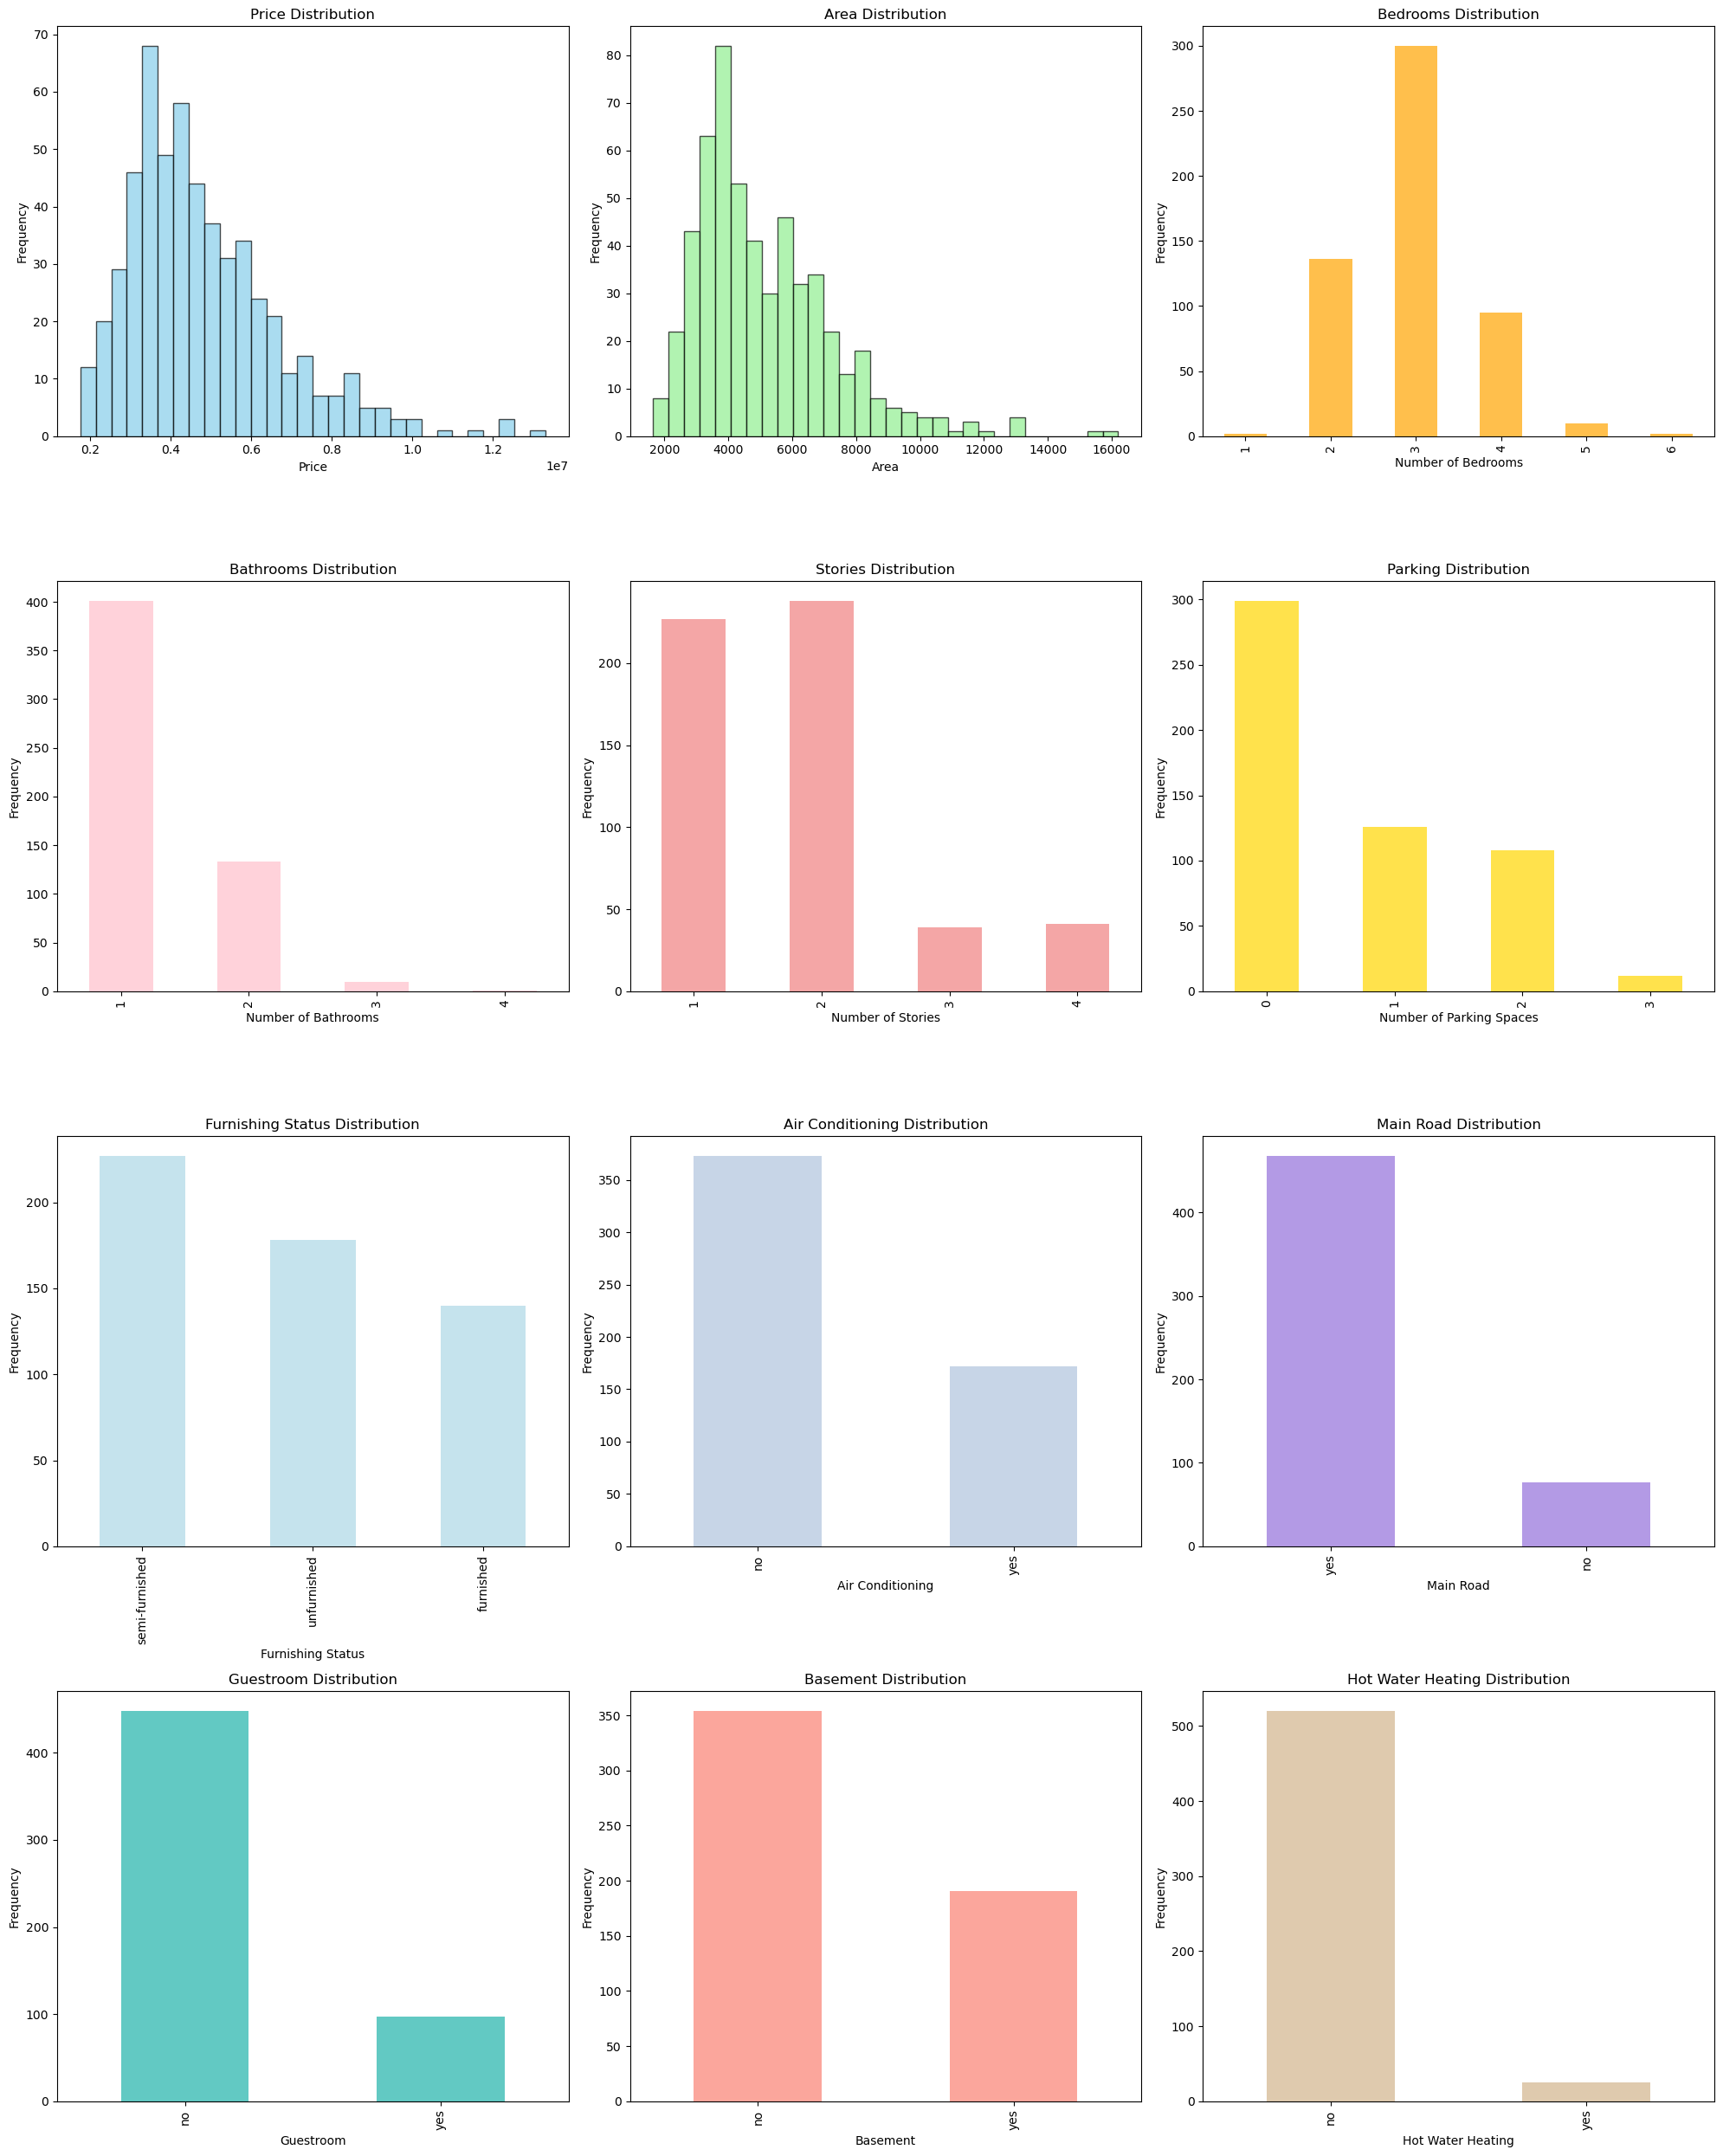

In [9]:
plt.figure(figsize=(20, 25))

# Price distribution (target variable)
plt.subplot(4, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Area distribution
plt.subplot(4, 3, 2)
plt.hist(df['area'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Bedrooms distribution
plt.subplot(4, 3, 3)
df['bedrooms'].value_counts().sort_index().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Bathrooms distribution
plt.subplot(4, 3, 4)
df['bathrooms'].value_counts().sort_index().plot(kind='bar', color='pink', alpha=0.7)
plt.title('Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Stories distribution
plt.subplot(4, 3, 5)
df['stories'].value_counts().sort_index().plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Stories Distribution')
plt.xlabel('Number of Stories')
plt.ylabel('Frequency')

# Parking distribution
plt.subplot(4, 3, 6)
df['parking'].value_counts().sort_index().plot(kind='bar', color='gold', alpha=0.7)
plt.title('Parking Distribution')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Frequency')

# Furnishing status distribution
plt.subplot(4, 3, 7)
df['furnishingstatus'].value_counts().plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Frequency')

# Air conditioning distribution
plt.subplot(4, 3, 8)
df['airconditioning'].value_counts().plot(kind='bar', color='lightsteelblue', alpha=0.7)
plt.title('Air Conditioning Distribution')
plt.xlabel('Air Conditioning')
plt.ylabel('Frequency')

# Main road distribution
plt.subplot(4, 3, 9)
df['mainroad'].value_counts().plot(kind='bar', color='mediumpurple', alpha=0.7)
plt.title('Main Road Distribution')
plt.xlabel('Main Road')
plt.ylabel('Frequency')

# Guestroom distribution
plt.subplot(4, 3, 10)
df['guestroom'].value_counts().plot(kind='bar', color='lightseagreen', alpha=0.7)
plt.title('Guestroom Distribution')
plt.xlabel('Guestroom')
plt.ylabel('Frequency')

# Basement distribution
plt.subplot(4, 3, 11)
df['basement'].value_counts().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Basement Distribution')
plt.xlabel('Basement')
plt.ylabel('Frequency')

# Hot Water Heating distribution
plt.subplot(4, 3, 12)
df['hotwaterheating'].value_counts().plot(kind='bar', color='tan', alpha=0.7)
plt.title('Hot Water Heating Distribution')
plt.xlabel('Hot Water Heating')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

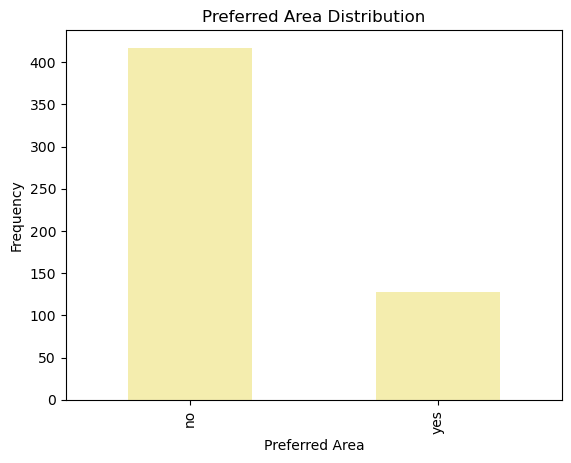

In [10]:
# Preferred Area distribution
df['prefarea'].value_counts().plot(kind='bar', color='khaki', alpha=0.7)
plt.title('Preferred Area Distribution')
plt.xlabel('Preferred Area')
plt.ylabel('Frequency')

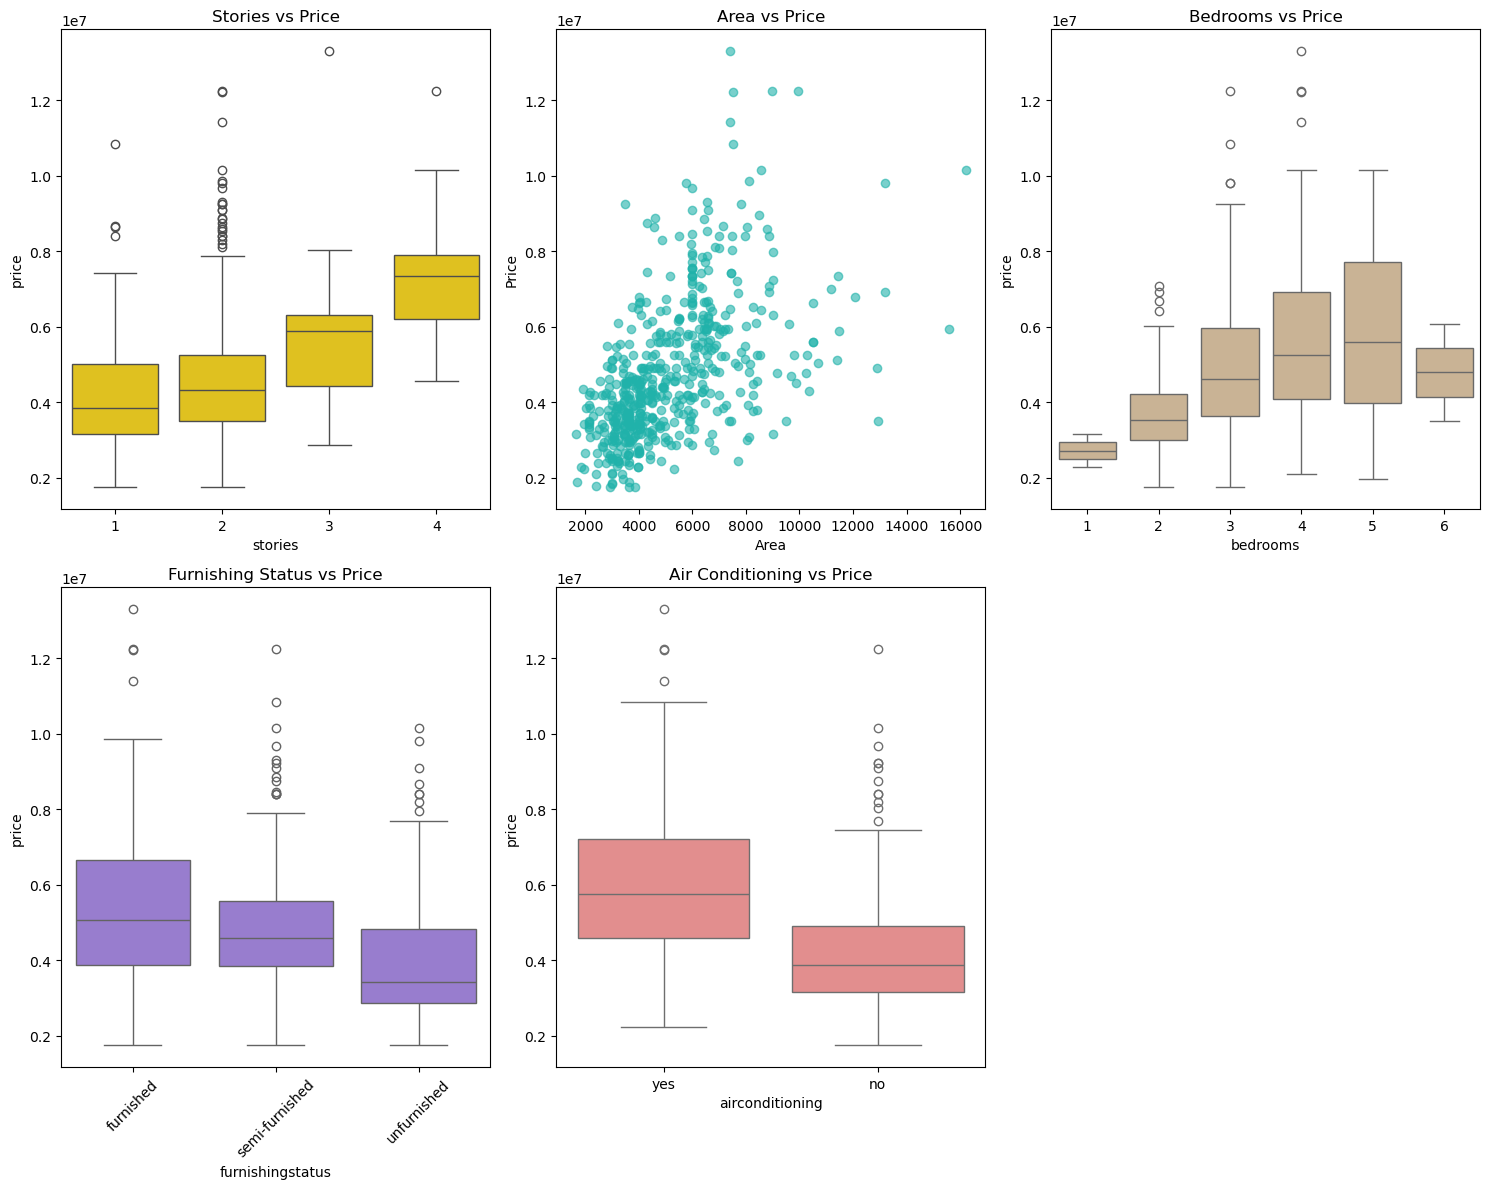

In [13]:
plt.figure(figsize=(15, 12))


# Area vs Price
plt.subplot(2, 3, 2)
plt.scatter(df['area'], df['price'], alpha=0.6, color='lightseagreen')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

# Bedrooms vs Price
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='bedrooms', y='price', color='tan')
plt.title('Bedrooms vs Price')

# Furnishing Status vs Price
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='furnishingstatus', y='price', color='mediumpurple')
plt.title('Furnishing Status vs Price')
plt.xticks(rotation=45)

# Air Conditioning vs Price
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='airconditioning', y='price', color='lightcoral')
plt.title('Air Conditioning vs Price')

# Stories vs Price
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='stories', y='price', color='gold')
plt.title('Stories vs Price')

plt.tight_layout()
plt.show()

Outlier Detection

In [8]:
# Define function for IQR outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in numerical columns [continuous]
outlier_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")


price:
  Outliers: 15 (2.75%)
  Bounds: [-35000.00, 9205000.00]
  Range: 1750000.00 to 13300000.00

area:
  Outliers: 12 (2.20%)
  Bounds: [-540.00, 10500.00]
  Range: 1650.00 to 16200.00

bedrooms:
  Outliers: 12 (2.20%)
  Bounds: [0.50, 4.50]
  Range: 1.00 to 6.00

bathrooms:
  Outliers: 1 (0.18%)
  Bounds: [-0.50, 3.50]
  Range: 1.00 to 4.00

stories:
  Outliers: 41 (7.52%)
  Bounds: [-0.50, 3.50]
  Range: 1.00 to 4.00

parking:
  Outliers: 12 (2.20%)
  Bounds: [-1.50, 2.50]
  Range: 0.00 to 3.00


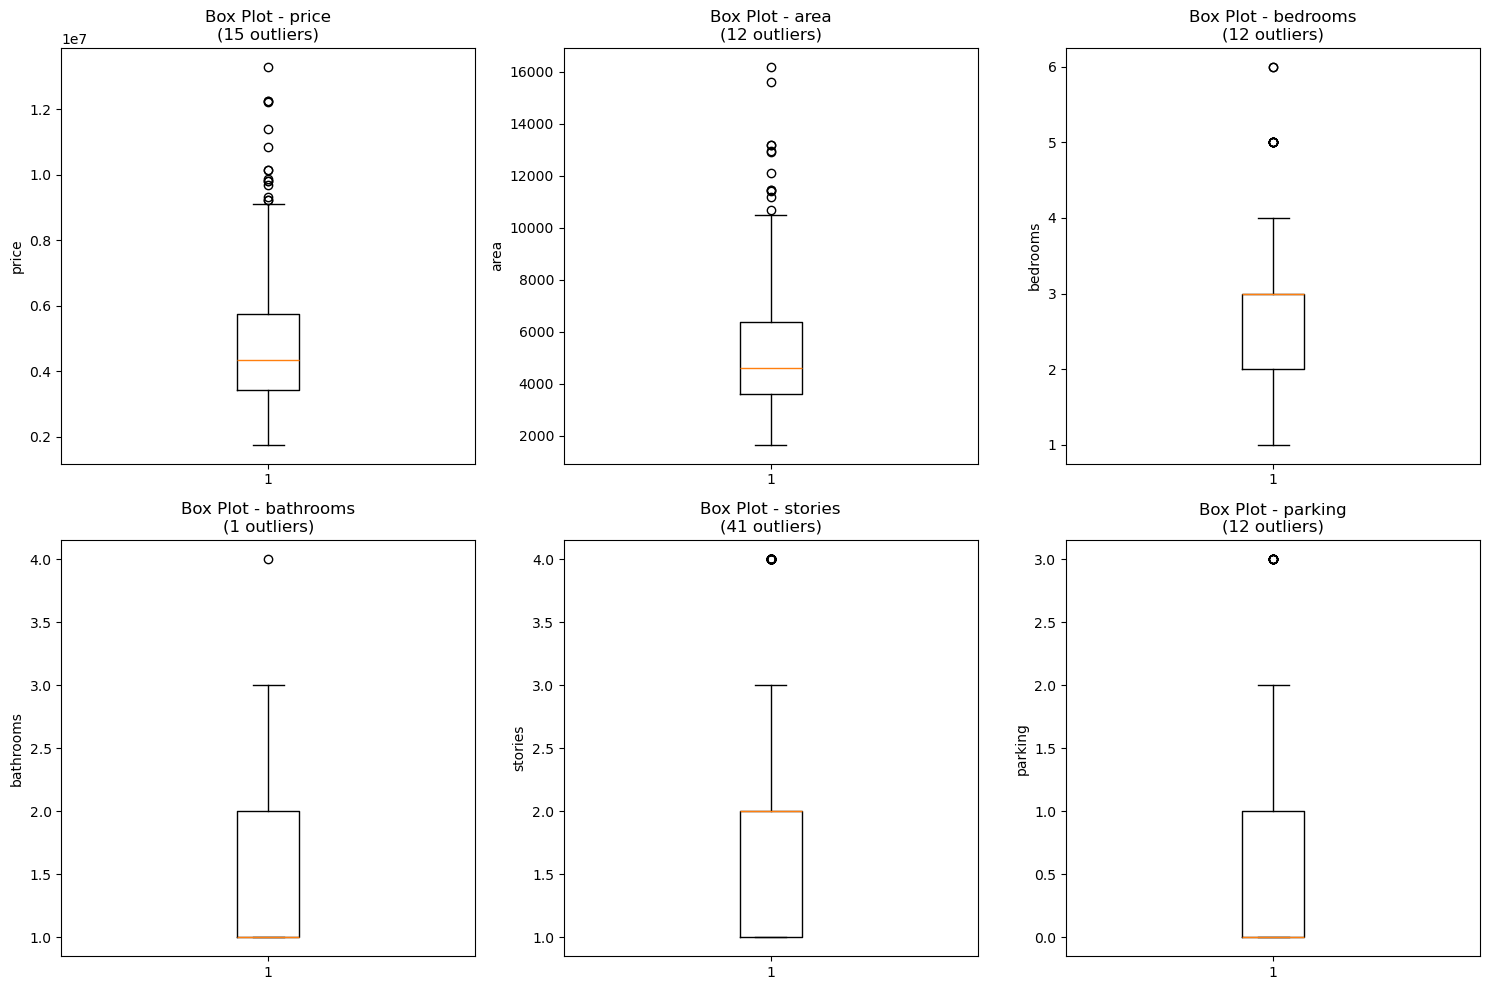

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns, 1):
    outliers, _, _ = detect_outliers_iqr(df, col)
    
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Box Plot - {col}\n({len(outliers)} outliers)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

we choose to remove outliers based on IQR method

In [13]:
for col in ['price', 'area']:
    _, lower, upper = detect_outliers_iqr(df, col)
    df = df[(df[col] >= lower) & (df[col] <= upper)]


Convert categorical variables to numerical

In [18]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    print(f"Before: {col} - {df[col].unique()}")
    df[col] = df[col].map({'yes': 1, 'no': 0})
    print(f"After: {col} - {df[col].unique()}")

Before: mainroad - ['yes' 'no']
After: mainroad - [1 0]
Before: guestroom - ['no' 'yes']
After: guestroom - [0 1]
Before: basement - ['no' 'yes']
After: basement - [0 1]
Before: hotwaterheating - ['no' 'yes']
After: hotwaterheating - [0 1]
Before: airconditioning - ['yes' 'no']
After: airconditioning - [1 0]
Before: prefarea - ['yes' 'no']
After: prefarea - [1 0]


Convert furnishing status using Label Encoding

In [19]:
print(f"\nFurnishing status before conversion: {df['furnishingstatus'].unique()}")

le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

furnishing_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Furnishing status encoding: {furnishing_mapping}")
print(f"Furnishing status after conversion: {df['furnishingstatus'].unique()}")


Furnishing status before conversion: ['furnished' 'semi-furnished' 'unfurnished']
Furnishing status encoding: {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}
Furnishing status after conversion: [0 1 2]


Correlation Heatmap

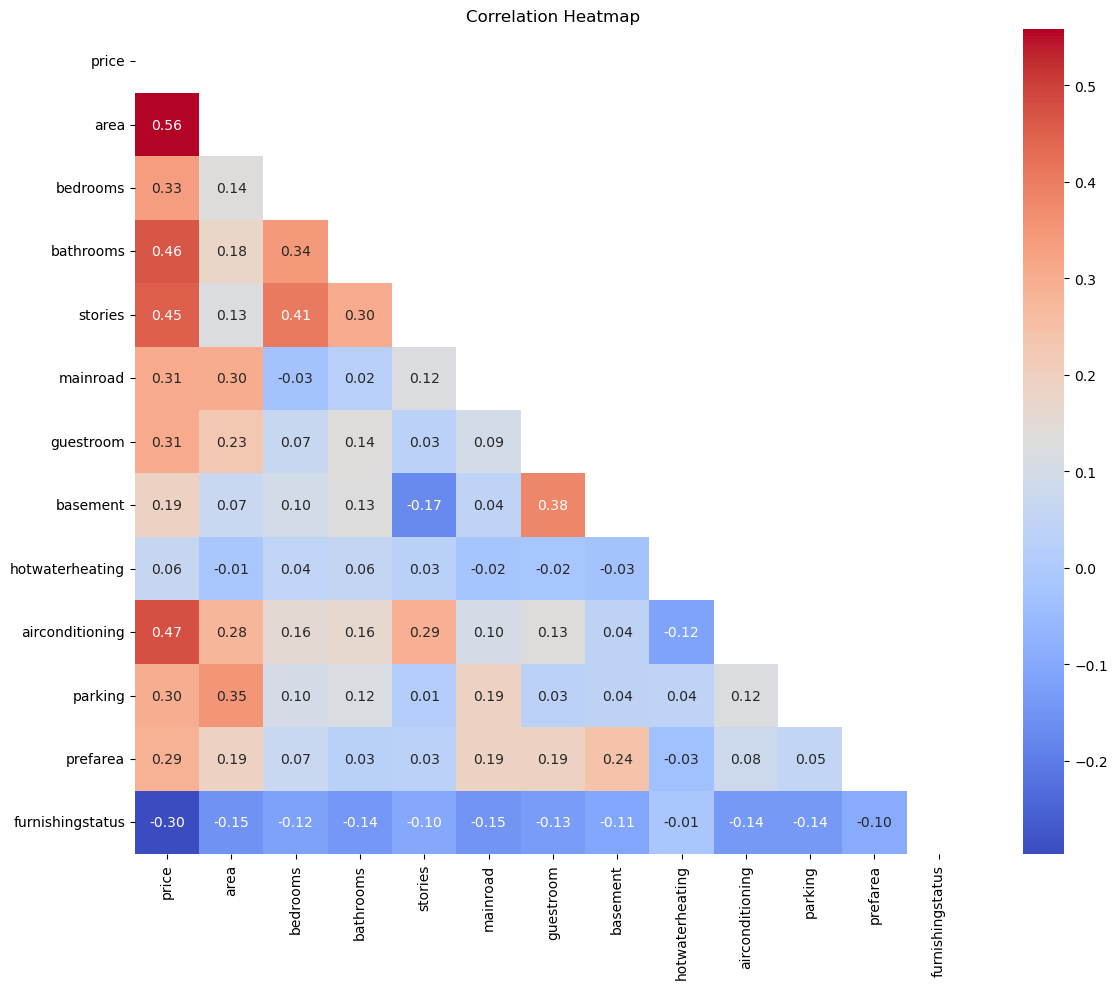

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modeling

Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  

y_pred_lr = lr.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

MSE: 1771751116594.0405
MAE: 979679.6912959907
R2 Score: 0.6494754192267793


Ridge Regression

In [49]:
ridge = Ridge()
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

print("\nRidge Regression Best Params:", ridge_grid.best_params_)
y_pred_ridge = ridge_grid.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Best Params: {'alpha': 10.0}
MSE: 1778081197208.694
MAE: 978653.4031173649
R2 Score: 0.648223071290926


Lasso Regression

In [50]:
lasso = Lasso(max_iter=10000)
lasso_params = {
    'alpha': [0.01, 0.1, 1.0]
}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)

print("\nLasso Regression Best Params:", lasso_grid.best_params_)
y_pred_lasso = lasso_grid.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression Best Params: {'alpha': 1.0}
MSE: 1771752886890.6372
MAE: 979680.0187766452
R2 Score: 0.6494750689899618


Decision Tree Regressor

In [54]:
dt = DecisionTreeRegressor()
dt_params = {
    'max_depth': [3, 5, 10, 15, 20],
    'criterion': ['squared_error', 'absolute_error'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5, 10]
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("\nDecision Tree Regressor Best Params:", dt_grid.best_params_)
y_pred_dt = dt_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Best Params: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
MSE: 2592568104379.556
MAE: 1216327.6198218914
R2 Score: 0.48708436562995516


Random Forest Regressor

In [30]:

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("\nRandom Forest Regressor Best Params:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Best Params: {'max_depth': 10, 'n_estimators': 100}
MSE: 1946404196455.2363
MAE: 1013775.071804692
R2 Score: 0.614921921827672


Gradient Boosting Regressor

In [31]:

gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("\nGradient Boosting Regressor Best Params:", gb_grid.best_params_)
y_pred_gb = gb_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 1699377987171.9304
MAE: 965281.4666117046
R2 Score: 0.6637937738829902


K-Nearest Neighbors Regressor

In [45]:
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

print("\nKNN Regressor Best Params:", knn_grid.best_params_)
y_pred_knn = knn_grid.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("R2 Score:", r2_score(y_test, y_pred_knn))


KNN Regressor Best Params: {'n_neighbors': 9, 'weights': 'distance'}
MSE: 2077417734172.9575
MAE: 1025724.4861839951
R2 Score: 0.589002104448128


## Model Comparison [Housing_Price_Data_Regression_Dataset]

In [56]:
models = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Ridge": r2_score(y_test, y_pred_ridge),
    "Lasso": r2_score(y_test, y_pred_lasso),
    "Decision Tree": r2_score(y_test, y_pred_dt),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "Gradient Boosting": r2_score(y_test, y_pred_gb),
    "KNN": r2_score(y_test, y_pred_knn)
}

for model, score in models.items():
    print(f"{model}: R2 Score = {score:.2f}")

Linear Regression: R2 Score = 0.65
Ridge: R2 Score = 0.65
Lasso: R2 Score = 0.65
Decision Tree: R2 Score = 0.49
Random Forest: R2 Score = 0.61
Gradient Boosting: R2 Score = 0.66
KNN: R2 Score = 0.59
